In [1]:
#Dirancang dalam melengkapai tugas akhir 
#Membuat program model prediksi bisnis dibidang kuliner
#Dengan keputusan pada variabel yang ada sehingga menentukan nilai dari suatu prediksi dengan algortima CART
#Menentukan nilai dari korelas pada variabel bebas dan terikat dengan algoritma kendalls tau
#Meningkatkan nilai akurasi pada algortma 

#Deklarasi libraray
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Deklarasi algoritma 
#df = pd.read_excel("C:/Users/adity/Documents/Kuliah/Semester 5/Big Data/TA - UAS/Kuisoner.xlsx")
#df.head()

In [3]:
#Mengganti nama kolom, mempersingkat nama kolom yang terdapat pada gform.
#Menghapus kolom
#df = df.drop(['Timestamp'], axis=1)

columns = ['waktu','Nama', 'Usia','Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan', 'prediksi', 'persentase']
df = pd.read_csv('C:/Users/adity/Documents/Kuliah/Semester 5/Big Data/TA - UAS/Kuisoner2.csv',header=None,   names = columns)
df = df.drop(index=0)
df = df.drop(['waktu'], axis = 1)
df.head()

,Nama,Usia,Kuliner yang digemari,Kuliner sering dikonsumsi,iklan kuliner,rating iklan,pembelian kuliner,peningkatan penjualan multiplatform,faktor yang merugikan,faktor yang menguntungkan,prediksi,persentase
1,Aghni,18 - 24 Tahun,Kuliner manca negara,Kuliner manca negara,Instagram,5,e-Commerce,Ya,Kualitas peralatan yang tidak higenis,Promosi menarik,Tidak,NaN
2,Omar,18 - 24 Tahun,Kuliner cepat saji,Kuliner cepat saji,Spanduk,3,e-Commerce,Ya,Kurang dana,Cita rasa kuliner,Tidak,NaN
3,Farhan,18 - 24 Tahun,Kuliner cepat saji,Kuliner rumahan,Instagram,4,e-Commerce,Ya,Kualitas kuliner yang tidak konsisten,Originalitas / Keunikan kuliner,Tidak,NaN
4,Naufaldi H,18 - 24 Tahun,Kuliner cepat saji,Kuliner khas daerah,Lainnya,5,e-Commerce,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Tidak,NaN
5,Revi Maulana,18 - 24 Tahun,Kuliner khas daerah,Kuliner khas daerah,Instagram,5,e-Commerce,Ya,Kualitas peralatan yang tidak higenis,Cita rasa kuliner,Tidak,NaN


In [4]:
#Mengecek nilai dari dtype pada dataframe
df = df.drop(['persentase'], axis = 1)
df.dtypes

Nama                                   object
Usia                                   object
Kuliner yang digemari                  object
Kuliner sering dikonsumsi              object
iklan kuliner                          object
rating iklan                           object
pembelian kuliner                      object
peningkatan penjualan multiplatform    object
faktor yang merugikan                  object
faktor yang menguntungkan              object
prediksi                               object
dtype: object

In [5]:
#Mengecek nilai dari missing value. 
mv = df.isna()
mv.sum()

Nama                                   0
Usia                                   0
Kuliner yang digemari                  0
Kuliner sering dikonsumsi              0
iklan kuliner                          0
rating iklan                           0
pembelian kuliner                      0
peningkatan penjualan multiplatform    0
faktor yang merugikan                  0
faktor yang menguntungkan              0
prediksi                               0
dtype: int64

In [6]:
#Melakukan aggregasi data perkelompok pada setiap kolom. 
#----------------------------------------------------

#Melakukan pengelompokan data.
#Menjumlahkan dengan usia
ag1 = df.groupby("Usia").count()
ag1.drop(columns=['Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag1 = ag1.rename(columns = {'Nama' : 'Total'})
ag1 = pd.DataFrame(ag1)
#mengkoversi nilai index menjadi kolom
ag1.reset_index(level=0, inplace=True)

#Menjumlahkan dengan kuliner yang digmeari
ag2 = df.groupby("Kuliner yang digemari").count()
ag2.drop(columns=['Usia', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag2 = ag2.rename(columns = {'Nama' : 'Total'})
ag2 = pd.DataFrame(ag2)
#mengkoversi nilai index menjadi kolom
ag2.reset_index(level=0, inplace=True)

#Menjumlahkan dengan kuliner sering dikonsumsi
ag3 = df.groupby("Kuliner sering dikonsumsi").count()
ag3.drop(columns=['Usia', 'Kuliner yang digemari', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag3 = ag3.rename(columns = {'Nama' : 'Total'})
ag3 = pd.DataFrame(ag3)
#mengkoversi nilai index menjadi kolom
ag3.reset_index(level=0, inplace=True)

#Menjumlahkan dengan iklan kuliner
ag4 = df.groupby("iklan kuliner").count()
ag4.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag4 = ag4.rename(columns = {'Nama' : 'Total'})
ag4 = pd.DataFrame(ag4)
#mengkoversi nilai index menjadi kolom
ag4.reset_index(level=0, inplace=True)

#Menjumlahkan dengan rating iklan
ag5 = df.groupby("rating iklan").count()
ag5.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag5 = ag5.rename(columns = {'Nama' : 'Total'})
ag5 = pd.DataFrame(ag5)
#mengkoversi nilai index menjadi kolom
ag5.reset_index(level=0, inplace=True)

#Menjumlahkan dengan pembelian kuliner
ag6 = df.groupby("pembelian kuliner").count()
ag6.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'peningkatan penjualan multiplatform', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag6 = ag6.rename(columns = {'Nama' : 'Total'})
ag6 = pd.DataFrame(ag6)
#mengkoversi nilai index menjadi kolom
ag6.reset_index(level=0, inplace=True)

#Menjumlahkan dengan peningkatan penjualan multiplatform
ag7 = df.groupby("peningkatan penjualan multiplatform").count()
ag7.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'faktor yang merugikan', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag7 = ag7.rename(columns = {'Nama' : 'Total'})
ag7 = pd.DataFrame(ag7)
#mengkoversi nilai index menjadi kolom
ag7.reset_index(level=0, inplace=True)

#Menjumlahkan dengan peningkatan penjualan faktor yang merugikan
ag8 = df.groupby("faktor yang merugikan").count()
ag8.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang menguntungkan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag8 = ag8.rename(columns = {'Nama' : 'Total'})
ag8 = pd.DataFrame(ag8)
#mengkoversi nilai index menjadi kolom
ag8.reset_index(level=0, inplace=True)

#Menjumlahkan dengan peningkatan penjualan faktor yang menguntungkan
ag9 = df.groupby("faktor yang menguntungkan").count()
ag9.drop(columns=['Usia', 'Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang merugikan'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag9 = ag9.rename(columns = {'Nama' : 'Total'})
ag9 = pd.DataFrame(ag9)
#mengkoversi nilai index menjadi kolom
ag9.reset_index(level=0, inplace=True)

Text(0, 0.5, 'Total')

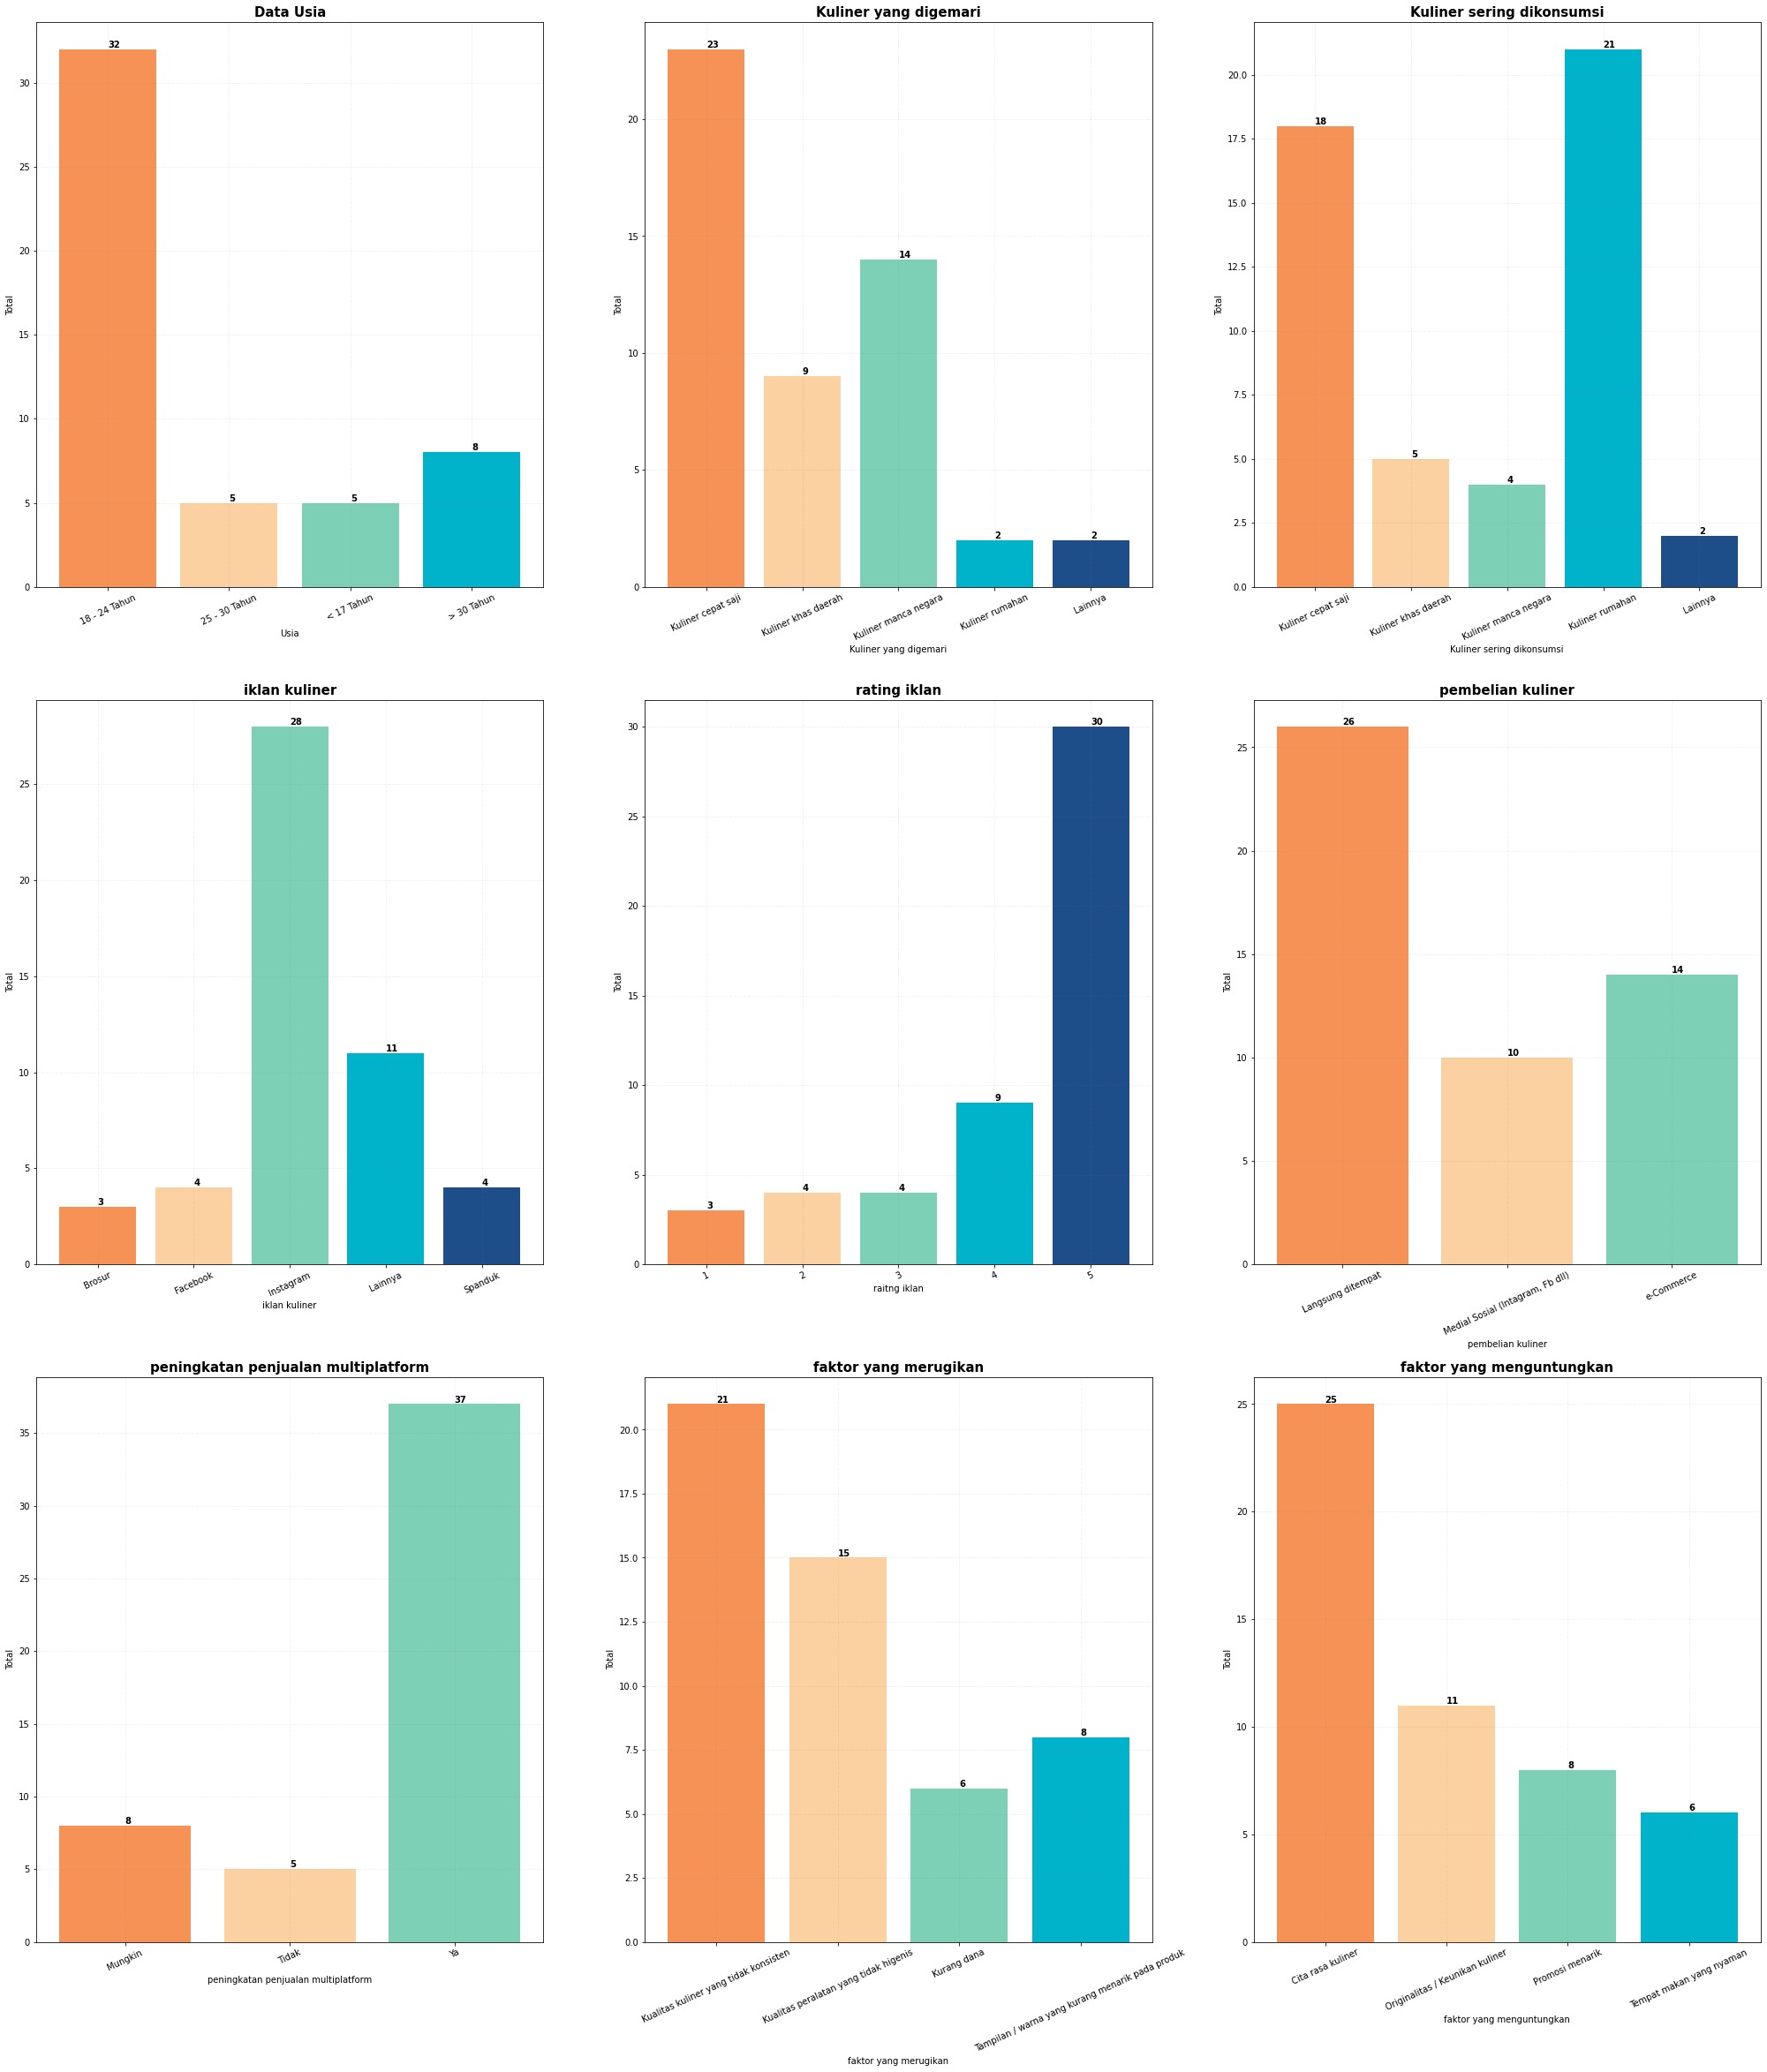

In [7]:
#Visualisasi data - multiple visualisasi data.
#----------------------------------------------------------
#https://towardsdatascience.com/different-bar-charts-in-python-6d984b9c6b17
#Membuat fungsi OOP pada visualisasi, dan tampilkan menjadi satu frame. 
def vz_bar_chart(x, height):
    barplot = plt.bar(x, height, color=['#f79256', '#fbd1a2', '#7dcfb6', '#00b2ca', '#1d4e89'])
    for bar in barplot:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontweight='bold')
    plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
    plt.xticks(rotation = 25)

plt.figure(figsize = (35,40))

#Visualisasi data 1 - Agreggasi usia
plt.subplot(3,3,1)
vz_bar_chart(ag1['Usia'], ag1['Total'])
plt.title("Data Usia", fontsize= 15, fontweight='bold')
plt.xlabel("Usia")
plt.ylabel("Total")

#Visualisasi data 2- Aggregasi kuliner yang digemari
plt.subplot(3,3,2)
vz_bar_chart(ag2['Kuliner yang digemari'], ag2['Total'])
plt.title("Kuliner yang digemari", fontsize= 15, fontweight='bold')
plt.xlabel("Kuliner yang digemari")
plt.ylabel("Total")

#Visualisasi data 3 - Aggregasi kuliner sering dikonsumsi
plt.subplot(3,3,3)
vz_bar_chart(ag3['Kuliner sering dikonsumsi'], ag3['Total'])
plt.title("Kuliner sering dikonsumsi", fontsize= 15, fontweight='bold')
plt.xlabel("Kuliner sering dikonsumsi")
plt.ylabel("Total")

#Visualisasi data 4 - Aggregasi data iklan kuliner
plt.subplot(3,3,4)
vz_bar_chart(ag4['iklan kuliner'], ag4['Total'])
plt.title("iklan kuliner", fontsize= 15, fontweight='bold')
plt.xlabel("iklan kuliner")
plt.ylabel("Total")

#Visualisasi data 5 - Aggregasi data iklan kuliner
plt.subplot(3,3,5)
vz_bar_chart(ag5['rating iklan'], ag5['Total'])
plt.title("rating iklan", fontsize= 15, fontweight='bold')
plt.xlabel("raitng iklan")
plt.ylabel("Total")

#Visualisasi data 6 - Aggregasi data iklan kuliner
plt.subplot(3,3,6)
vz_bar_chart(ag6['pembelian kuliner'], ag6['Total'])
plt.title("pembelian kuliner", fontsize= 15, fontweight='bold')
plt.xlabel("pembelian kuliner")
plt.ylabel("Total")

#Visualisasi data 7 - Aggregasi data iklan kuliner
plt.subplot(3,3,7)
vz_bar_chart(ag7['peningkatan penjualan multiplatform'], ag7['Total'])
plt.title("peningkatan penjualan multiplatform", fontsize= 15, fontweight='bold')
plt.xlabel("peningkatan penjualan multiplatform")
plt.ylabel("Total")

#Visualisasi data 8 - Aggregasi data faktor yang merugikan
plt.subplot(3,3,8)
vz_bar_chart(ag8['faktor yang merugikan'], ag8['Total'])
plt.title("faktor yang merugikan", fontsize= 15, fontweight='bold')
plt.xlabel("faktor yang merugikan")
plt.ylabel("Total")

#Visualisasi data 9 - Aggregasi data faktor yang menguntungkan
plt.subplot(3,3,9)
vz_bar_chart(ag9['faktor yang menguntungkan'], ag9['Total'])
plt.title("faktor yang menguntungkan", fontsize= 15, fontweight='bold')
plt.xlabel("faktor yang menguntungkan")
plt.ylabel("Total")

In [8]:
#----Melakukan algoritma CART
#Memberikan label pada setiap kolom yang akan terproses menjadi decission tree

df = pd.DataFrame(data = df.iloc[:,2:11].values, columns = ['Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan', 'pembelian kuliner','peningkatan penjualan multiplatform', 
                                                            'faktor yang merugikan', 'faktor yang menguntungkan', 'prediksi'])
le = LabelEncoder()
df_encoded = df.iloc[:,0:9]

for i in df_encoded:
    df_encoded[i] = le.fit_transform(df_encoded[i])

df_encoded.head()

,Kuliner yang digemari,Kuliner sering dikonsumsi,iklan kuliner,rating iklan,pembelian kuliner,peningkatan penjualan multiplatform,faktor yang merugikan,faktor yang menguntungkan,prediksi
0,2,2,2,4,2,2,1,2,0
1,0,0,4,2,2,2,2,0,0
2,0,3,2,3,2,2,0,1,0
3,0,1,3,4,2,2,0,0,0
4,1,1,2,4,2,2,1,0,0


In [9]:
#menampilkan informasi yang telah diberi label
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Kuliner yang digemari                50 non-null     int32
 1   Kuliner sering dikonsumsi            50 non-null     int32
 2   iklan kuliner                        50 non-null     int32
 3   rating iklan                         50 non-null     int32
 4   pembelian kuliner                    50 non-null     int32
 5   peningkatan penjualan multiplatform  50 non-null     int32
 6   faktor yang merugikan                50 non-null     int32
 7   faktor yang menguntungkan            50 non-null     int32
 8   prediksi                             50 non-null     int32
dtypes: int32(9)
memory usage: 1.9 KB


In [10]:
#Fitur data yang terdapat pada dataset.
X = df_encoded.iloc[:,0:8]
#Label data yang terdapata pada dataset
y = df_encoded.iloc[:,8]

#Melakukan spilt validasi pada dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
clf = DecisionTreeClassifier(criterion='gini')
model = clf.fit(X_train, y_train)

In [11]:
#Gambaran decission tree dalam bentuk teks
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_0 <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_0 <= 1.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: 0
|   |--- feature_6 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_5 <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 0



In [12]:
#membuat variabel prediksi untuk algorita cart
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
#Membandingkan nilai 10 data pertama 
df_dataTest = df_encoded['prediksi']
df_arrayTest = np.array(df_dataTest[0:10])

print(y_predict, '--', df_arrayTest)

[0 1 0 0 0 0 0 0 0 0] -- [0 0 0 0 0 1 0 0 1 0]


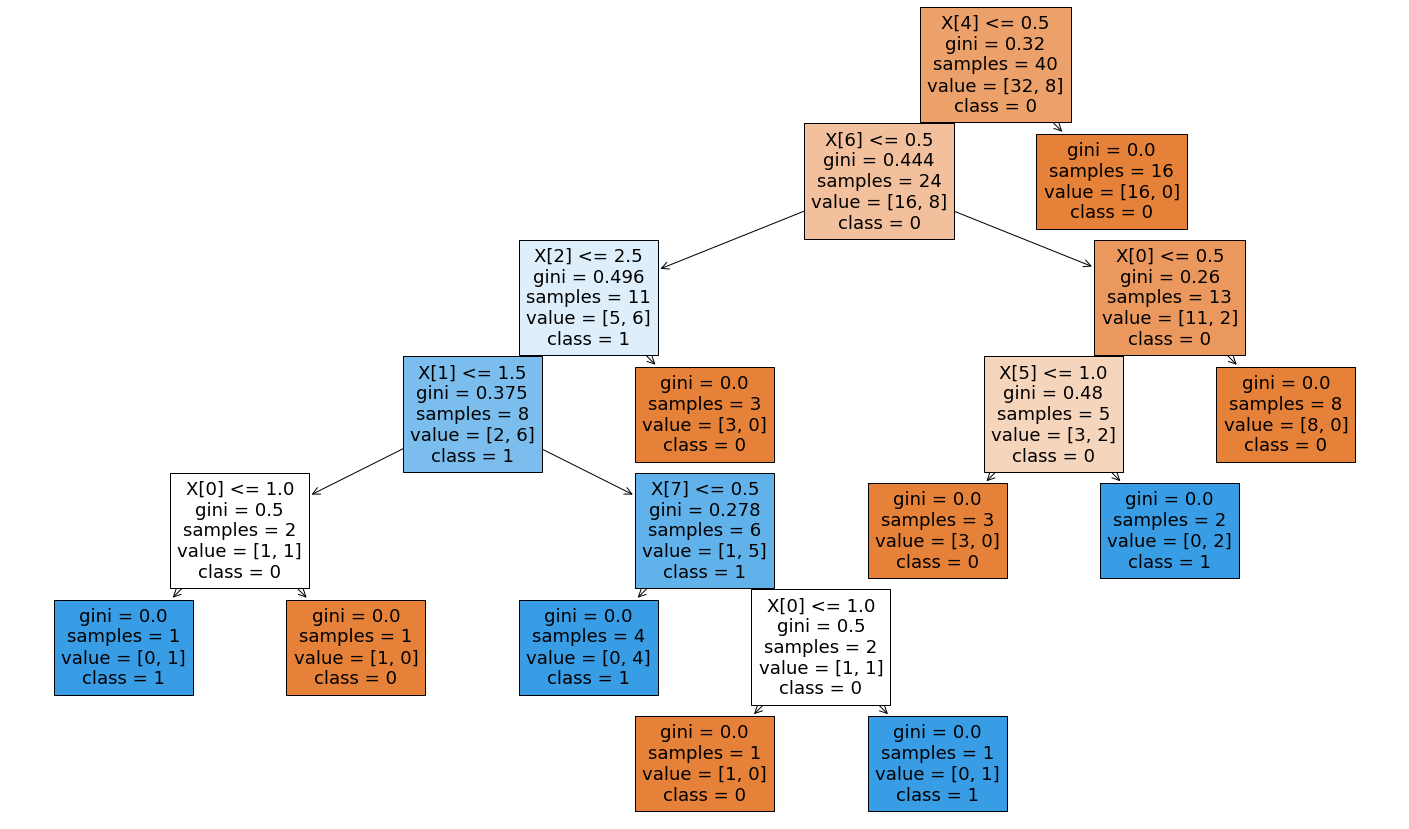

In [14]:
#Menggambarkan visualisasi decission tree dengan algoritma cart

fig = plt.figure(figsize =(25,15))
vz_cart = tree.plot_tree(clf, class_names=['0', '1'], filled = True)

In [15]:
#Menghitung nilai akurasi pada algoritma cart
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9


In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(confusion_matrix(y_test, y_predict))

[[9 1]
 [0 0]]


In [18]:
#membuat variabel prediksi untuk algoritma cart nilai X
y_predict_test = clf.predict(X_test)
y_predict_test = pd.DataFrame({'prediksi_cart' : y_predict_test})
y_predict_test.head()

,prediksi_cart
0,0
1,1
2,0
3,0
4,0


In [19]:
y_predict_train = clf.predict(X_train)
y_predict_train = pd.DataFrame({'prediksi_cart' : y_predict_train})
y_predict_train.head()

,prediksi_cart
0,1
1,0
2,0
3,0
4,0


In [20]:
#Menggabungkan keseluruhan nilai prediksi.
df_predict = pd.concat([y_predict_test, y_predict_train])
df_predict.reset_index(inplace=True, drop=True)
df_predict.head()

,prediksi_cart
0,0
1,1
2,0
3,0
4,0


In [21]:
actual_data = df['prediksi']
actual_data = pd.DataFrame(actual_data)
actual_data.head()

,prediksi
0,Tidak
1,Tidak
2,Tidak
3,Tidak
4,Tidak


In [22]:
#Menggabungkan nilai kedua dari dataframe actual data dan prediksi data.
df_data = pd.concat([df, df_predict], axis=1) 
df_data = df_data[df_data.prediksi == 'Ya']
df_data

,Kuliner yang digemari,Kuliner sering dikonsumsi,iklan kuliner,rating iklan,pembelian kuliner,peningkatan penjualan multiplatform,faktor yang merugikan,faktor yang menguntungkan,prediksi,prediksi_cart
5,Kuliner cepat saji,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Ya,0
8,Kuliner cepat saji,Kuliner cepat saji,Instagram,5,Langsung ditempat,Ya,Kualitas peralatan yang tidak higenis,Cita rasa kuliner,Ya,0
16,Kuliner cepat saji,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas peralatan yang tidak higenis,Cita rasa kuliner,Ya,0
22,Kuliner cepat saji,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Ya,0
24,Kuliner manca negara,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Ya,0
25,Kuliner manca negara,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Promosi menarik,Ya,0
26,Kuliner cepat saji,Kuliner cepat saji,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Ya,0
32,Kuliner cepat saji,Kuliner rumahan,Instagram,5,Langsung ditempat,Ya,Kualitas kuliner yang tidak konsisten,Cita rasa kuliner,Ya,0


In [23]:
#Mengubah nilai untuk memproses kendall's tau 
#nilai yang ada, diubah berdasarkan persentase pada setiap kategori 
#persentase didapatkan pada hitungan manual.

df_kendall = pd.DataFrame(df)

df_kendall.loc[df_kendall['Kuliner yang digemari'] == 'Kuliner khas daerah', 'Kuliner yang digemari'] = 18
df_kendall.loc[df_kendall['Kuliner yang digemari'] == 'Kuliner manca negara', 'Kuliner yang digemari'] = 28
df_kendall.loc[df_kendall['Kuliner yang digemari'] == 'Kuliner cepat saji', 'Kuliner yang digemari'] = 46
df_kendall.loc[df_kendall['Kuliner yang digemari'] == 'Kuliner rumahan', 'Kuliner yang digemari'] = 4
df_kendall.loc[df_kendall['Kuliner yang digemari'] == 'Lainnya', 'Kuliner yang digemari'] = 4

df_kendall.loc[df_kendall['Kuliner sering dikonsumsi'] == 'Kuliner khas daerah', 'Kuliner sering dikonsumsi'] = 10
df_kendall.loc[df_kendall['Kuliner sering dikonsumsi'] == 'Kuliner manca negara', 'Kuliner sering dikonsumsi'] = 8
df_kendall.loc[df_kendall['Kuliner sering dikonsumsi'] == 'Kuliner cepat saji', 'Kuliner sering dikonsumsi'] = 36
df_kendall.loc[df_kendall['Kuliner sering dikonsumsi'] == 'Kuliner rumahan', 'Kuliner sering dikonsumsi'] = 42
df_kendall.loc[df_kendall['Kuliner sering dikonsumsi'] == 'Lainnya', 'Kuliner sering dikonsumsi'] = 4

df_kendall.loc[df_kendall['iklan kuliner'] == 'Instagram', 'iklan kuliner'] = 56
df_kendall.loc[df_kendall['iklan kuliner'] == 'Facebook', 'iklan kuliner'] = 8
df_kendall.loc[df_kendall['iklan kuliner'] == 'Spanduk', 'iklan kuliner'] = 8
df_kendall.loc[df_kendall['iklan kuliner'] == 'Brosur', 'iklan kuliner'] = 6
df_kendall.loc[df_kendall['iklan kuliner'] == 'Lainnya', 'iklan kuliner'] = 22

df_kendall.loc[df_kendall['rating iklan'] == '1', 'rating iklan'] = 6
df_kendall.loc[df_kendall['rating iklan'] == '2', 'rating iklan'] = 8
df_kendall.loc[df_kendall['rating iklan'] == '3', 'rating iklan'] = 8
df_kendall.loc[df_kendall['rating iklan'] == '4', 'rating iklan'] = 16
df_kendall.loc[df_kendall['rating iklan'] == '5', 'rating iklan'] = 60

df_kendall.loc[df_kendall['pembelian kuliner'] == 'e-Commerce', 'pembelian kuliner'] = 28
df_kendall.loc[df_kendall['pembelian kuliner'] == 'Medial Sosial (Intagram, Fb dll)', 'pembelian kuliner'] = 20
df_kendall.loc[df_kendall['pembelian kuliner'] == 'Langsung ditempat', 'pembelian kuliner'] = 52

df_kendall.loc[df_kendall['peningkatan penjualan multiplatform'] == 'Ya', 'peningkatan penjualan multiplatform'] = 74
df_kendall.loc[df_kendall['peningkatan penjualan multiplatform'] == 'Tidak', 'peningkatan penjualan multiplatform'] = 10
df_kendall.loc[df_kendall['peningkatan penjualan multiplatform'] == 'Mungkin', 'peningkatan penjualan multiplatform'] = 16

df_kendall.loc[df_kendall['faktor yang merugikan'] == 'Tampilan / warna yang kurang menarik pada produk', 'faktor yang merugikan'] = 16
df_kendall.loc[df_kendall['faktor yang merugikan'] == 'Kualitas kuliner yang tidak konsisten', 'faktor yang merugikan'] = 42
df_kendall.loc[df_kendall['faktor yang merugikan'] == 'Kualitas peralatan yang tidak higenis', 'faktor yang merugikan'] = 30
df_kendall.loc[df_kendall['faktor yang merugikan'] == 'Kurang dana', 'faktor yang merugikan'] = 12

df_kendall.loc[df_kendall['faktor yang menguntungkan'] == 'Originalitas / Keunikan kuliner', 'faktor yang menguntungkan'] = 22
df_kendall.loc[df_kendall['faktor yang menguntungkan'] == 'Cita rasa kuliner', 'faktor yang menguntungkan'] = 50
df_kendall.loc[df_kendall['faktor yang menguntungkan'] == 'Promosi menarik', 'faktor yang menguntungkan'] = 16
df_kendall.loc[df_kendall['faktor yang menguntungkan'] == 'Tempat makan yang nyaman', 'faktor yang menguntungkan'] = 12

df_kendall.loc[df_kendall['prediksi'] == 'Ya', 'prediksi'] = 1
df_kendall.loc[df_kendall['prediksi'] == 'Tidak', 'prediksi'] = 0

df_kendall.head()

,Kuliner yang digemari,Kuliner sering dikonsumsi,iklan kuliner,rating iklan,pembelian kuliner,peningkatan penjualan multiplatform,faktor yang merugikan,faktor yang menguntungkan,prediksi
0,28,8,56,60,28,74,30,16,0
1,46,36,8,8,28,74,12,50,0
2,46,42,56,16,28,74,42,22,0
3,46,10,22,60,28,74,42,50,0
4,18,10,56,60,28,74,30,50,0


In [24]:
df_kendall['Kuliner yang digemari'] = df_kendall['Kuliner yang digemari'].astype(int)
df_kendall['Kuliner sering dikonsumsi'] = df_kendall['Kuliner sering dikonsumsi'].astype(int)
df_kendall['iklan kuliner'] = df_kendall['iklan kuliner'].astype(int)
df_kendall['rating iklan'] = df_kendall['rating iklan'].astype(int)
df_kendall['pembelian kuliner'] = df_kendall['pembelian kuliner'].astype(int)
df_kendall['peningkatan penjualan multiplatform'] = df_kendall['peningkatan penjualan multiplatform'].astype(int)
df_kendall['faktor yang menguntungkan'] = df_kendall['faktor yang menguntungkan'].astype(int)
df_kendall['faktor yang merugikan'] = df_kendall['faktor yang merugikan'].astype(int)
df_kendall['prediksi'] = df_kendall['prediksi'].astype(int)

df_kendall.dtypes

Kuliner yang digemari                  int32
Kuliner sering dikonsumsi              int32
iklan kuliner                          int32
rating iklan                           int32
pembelian kuliner                      int32
peningkatan penjualan multiplatform    int32
faktor yang merugikan                  int32
faktor yang menguntungkan              int32
prediksi                               int32
dtype: object

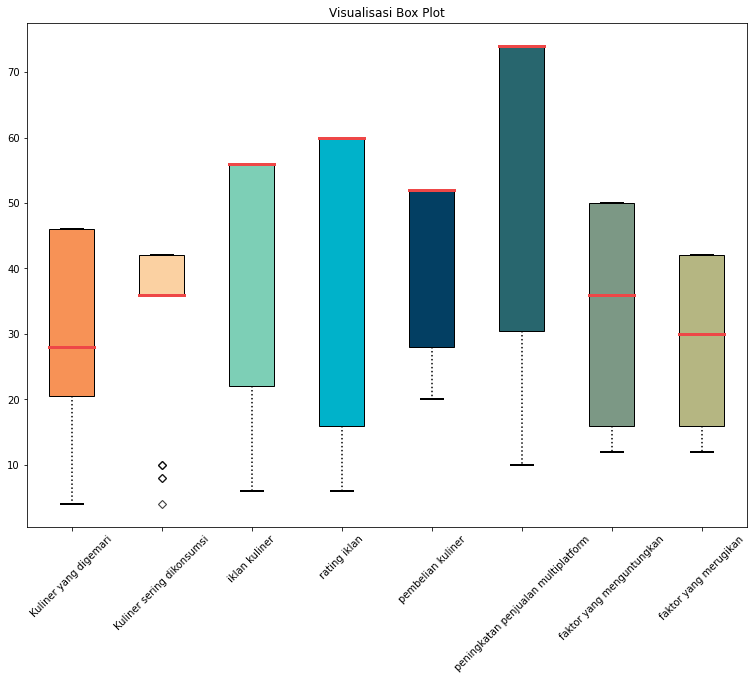

In [25]:
data = [df_kendall['Kuliner yang digemari'], df_kendall['Kuliner sering dikonsumsi'], df_kendall['iklan kuliner'], df_kendall['rating iklan'], df_kendall['pembelian kuliner'], df_kendall['peningkatan penjualan multiplatform'], df_kendall['faktor yang menguntungkan'], df_kendall['faktor yang merugikan']]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist= True)
 
colors = ['#f79256', '#fbd1a2', '#7dcfb6', '#00b2ca','#033f63','#28666e', '#7c9885', '#b5b682' ]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#000000',
                linewidth = 1.5,
                linestyle =":")
# caps
for cap in bp['caps']:
    cap.set(color ='#000000',
            linewidth = 2)
 
# medians
for median in bp['medians']:
    median.set(color ='#EE4747',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#000000',
              alpha = 0.5)
      
# x-axis labels
ax.set_xticklabels(['Kuliner yang digemari', 'Kuliner sering dikonsumsi', 'iklan kuliner', 'rating iklan',
                    'pembelian kuliner', 'peningkatan penjualan multiplatform', 'faktor yang menguntungkan', 'faktor yang merugikan'], rotation = 45)
 
# Adding title
plt.title("Visualisasi Box Plot")
     
# show plot
plt.show(bp)
 
# show plot
plt.show()

In [26]:
#Melihat korelas antara dua variabel dengan kendalls
from scipy.stats import kendalltau

#Kuliner yang digemari dengan prediksi
corr, _ = kendalltau(df_kendall['Kuliner yang digemari'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel Kuliner yang digemari dengan prediksi : %.5f' % corr)

#Kuliner sering dikonsumsi dengan prediksi
corr, _ = kendalltau(df_kendall['Kuliner sering dikonsumsi'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel Kuliner sering dikonsumsi dengan prediksi : %.5f' % corr)

#Iklan kuliner dengan prediksi
corr, _ = kendalltau(df_kendall['iklan kuliner'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel iklan Kuliner dengan prediksi : %.5f' % corr)

#Rating Iklan dengan prediksi
corr, _ = kendalltau(df_kendall['rating iklan'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel rating iklan dengan prediksi : %.5f' % corr)

#Pembelian kuliner dengan prediksi
corr, _ = kendalltau(df_kendall['pembelian kuliner'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel pembelian kuliner dengan prediksi : %.5f' % corr)

#Peningkatan penjualan multiplatform dengan prediksi
corr, _ = kendalltau(df_kendall['peningkatan penjualan multiplatform'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel Peningkatan penjualan multiplatform dengan prediksi : %.5f' % corr)

#Faktor yang merugikan dengan prediksi
corr, _ = kendalltau(df_kendall['faktor yang merugikan'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel Faktor yang merugikan dengan prediksi : %.5f' % corr)

#Faktor yang menguntungkan dengan prediksi
corr, _ = kendalltau(df_kendall['faktor yang menguntungkan'], df_kendall['prediksi'])
print('Korelasi kendalls tau variabel Faktor yang menguntungkan dengan prediksi : %.5f' % corr)

Korelasi kendalls tau variabel Kuliner yang digemari dengan prediksi : 0.26745
Korelasi kendalls tau variabel Kuliner sering dikonsumsi dengan prediksi : 0.28902
Korelasi kendalls tau variabel iklan Kuliner dengan prediksi : 0.34806
Korelasi kendalls tau variabel rating iklan dengan prediksi : 0.32462
Korelasi kendalls tau variabel pembelian kuliner dengan prediksi : 0.37895
Korelasi kendalls tau variabel Peningkatan penjualan multiplatform dengan prediksi : 0.24857
Korelasi kendalls tau variabel Faktor yang merugikan dengan prediksi : 0.29644
Korelasi kendalls tau variabel Faktor yang menguntungkan dengan prediksi : 0.27507


In [27]:
#Melakukan validasi kembali dengan cart dengan menerapkan algoritma kendall's tau 
#kolom yang ada berdasarkan nilai dari akurasi tertinggi 

df = pd.DataFrame(data = df_kendall[['iklan kuliner', 'rating iklan', 'pembelian kuliner', 'prediksi']])
le = LabelEncoder()
df_encoded = df.iloc[:,0:4]

for i in df_encoded:
    df_encoded[i] = le.fit_transform(df_encoded[i])

df_encoded.head()

,iklan kuliner,rating iklan,pembelian kuliner,prediksi
0,3,3,1,0
1,1,1,1,0
2,3,2,1,0
3,2,3,1,0
4,3,3,1,0


In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   iklan kuliner      50 non-null     int64
 1   rating iklan       50 non-null     int64
 2   pembelian kuliner  50 non-null     int64
 3   prediksi           50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [29]:
#Fitur data yang terdapat pada dataset.
X = df_encoded.iloc[:,0:3]
#Label data yang terdapata pada dataset
y = df_encoded.iloc[:,3]

#Melakukan spilt validasi pada dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
clf = DecisionTreeClassifier(criterion='gini')
model = clf.fit(X_train, y_train)

In [30]:
#Memberikan gambaran terkait teks pada decission tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- class: 0
|--- feature_2 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: 1



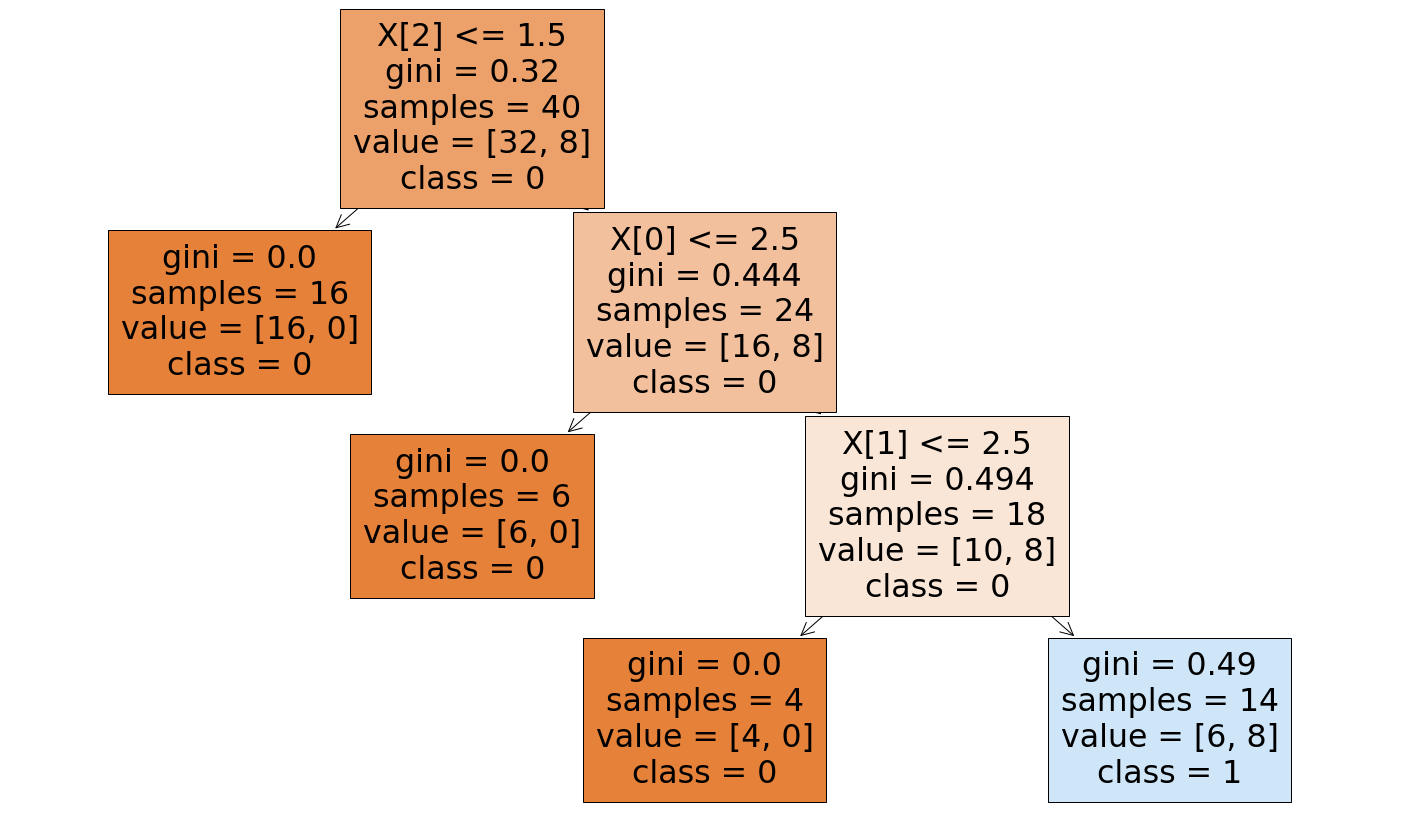

In [31]:
#Memberikan gambaran terkait visualisasi algortma cart.
#sehingga mendapatkan nilai prediksinya.

fig = plt.figure(figsize =(25,15))
vz_cart = tree.plot_tree(clf, class_names=['0', '1'], filled = True)

In [32]:
#Membuat variabel untuk nilai prediksi 
y_predict = clf.predict(X_test)

In [33]:
#Membandingkan nilai 10 data pertama 
df_dataTestKendall = df_kendall['prediksi']
df_arrayTestKendall = np.array(df_dataTest[0:9])

print(y_predict, '--', df_arrayTestKendall)

[0 0 0 0 0 0 0 0 0 0] -- [0 0 0 0 0 1 0 0 1]


In [34]:
#Menghitung nilai akurasi pada algortima
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 1.0


In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [36]:
print(confusion_matrix(y_test, y_predict))

[[10]]


In [37]:
#membuat variabel prediksi untuk algoritma cart nilai X
y_predict_testKendall = clf.predict(X_test)
y_predict_testKendall = pd.DataFrame({'prediksi_cart' : y_predict_testKendall})
y_predict_testKendall

,prediksi_cart
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [38]:
y_predict_trainKendall = clf.predict(X_train)
y_predict_trainKendall = pd.DataFrame({'prediksi_cart' : y_predict_trainKendall})
y_predict_trainKendall.head()

,prediksi_cart
0,1
1,0
2,1
3,0
4,0


In [39]:
#Menggabungkan keseluruhan nilai prediksi.
df_predict = pd.concat([y_predict_trainKendall, y_predict_testKendall])
df_predict.reset_index(inplace=True, drop=True)
df_predict.head()

,prediksi_cart
0,1
1,0
2,1
3,0
4,0


In [40]:
actual_data = df_kendall['prediksi']
actual_data = pd.DataFrame(actual_data)
actual_data.head()

,prediksi
0,0
1,0
2,0
3,0
4,0


In [41]:
df_data = pd.concat([df_encoded, df_predict], axis=1) 
df_data2 = df_data[df_data.prediksi == 1]
df_data2

,iklan kuliner,rating iklan,pembelian kuliner,prediksi,prediksi_cart
5,3,3,2,1,0
8,3,3,2,1,1
16,3,3,2,1,0
22,3,3,2,1,0
24,3,3,2,1,0
25,3,3,2,1,1
26,3,3,2,1,0
32,3,3,2,1,0
